### Imports

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


### Load correct binary model

In [4]:
model = load_model("models/efficientnet_binary_fruit.h5")

### Prediction function

In [5]:
def predict_image(img_path, threshold=0.5):
    # Load image
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prob = model.predict(img_array, verbose=0)[0][0]

    # Interpret result
    if prob >= threshold:
        label = "Rotten"
        confidence = prob
    else:
        label = "Fresh"
        confidence = 1 - prob

    # Plot
    plt.imshow(img)
    plt.title(f"Prediction: {label} ({confidence*100:.2f}%)")
    plt.axis("off")
    plt.show()

    print(f"Prediction: {label}")
    print(f"Confidence: {confidence*100:.2f}%")


### prediction 

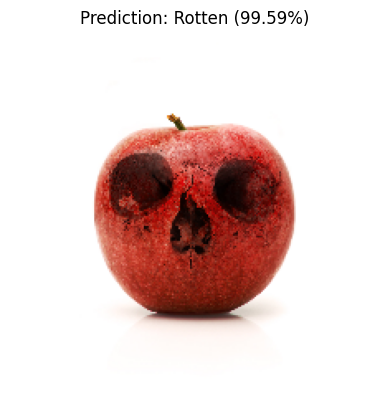

Prediction: Rotten
Confidence: 99.59%


In [6]:
predict_image("test-image/test-pic-rotten-apple.jpg")


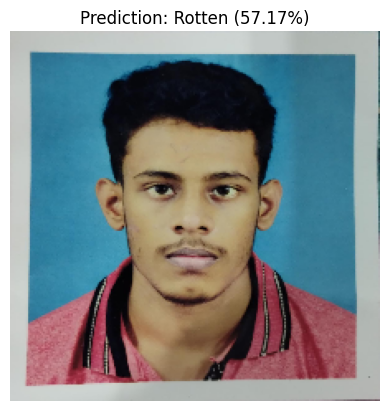

Prediction: Rotten
Confidence: 57.17%


In [9]:
predict_image("test-image/passport_pic.jpg")
